In [1]:
import sys, os
sys.path.append(os.path.abspath('../src'))

from data_processor import DataProcessor

############ 1 Data Processing ############

# Define file path 
file_path = '../data/raw/data_factory_1.xlsx'  
dp = DataProcessor(file_path)
dp.change_pivot('timestamp', 'param_name', 'value')
dp.rename_column_to_timestamp('timestamp')
dp.rename_column_to_permeatepressure('Permeate Pressure')
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])


In [2]:
dp.df.head()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,Recovery
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,269.623333,69.427135
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,270.177500,69.401548
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,269.188750,69.404638
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,270.778750,69.566374
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,269.938333,69.423221


In [3]:
from data_processor import CycleProcessor

cp = CycleProcessor(signal_col='FeedFlow', df=dp.df, threshold=10)
cp.identify_cycles()
cp.assign_cycle_features()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,Recovery,cycle_id,cycle_time
0,2022-11-03 06:00:00,119.523201,181.195417,62.438006,238.817517,420.034116,201.296667,82.621667,34.562396,2.396977,300.373333,71.583551,1,1
1,2022-11-03 07:00:00,122.218263,188.333197,63.654724,238.381998,422.453790,208.745492,82.259016,34.873130,2.530642,300.293852,71.111542,1,2
2,2022-11-03 08:00:00,120.914281,184.908333,62.959290,238.534183,419.866667,205.063333,83.078333,33.390885,2.476101,299.998750,71.292940,1,3
3,2022-11-03 09:00:00,121.840054,186.624583,63.396009,238.567517,420.833333,206.750417,82.926667,33.334062,2.516199,300.169167,71.158316,1,4
4,2022-11-03 10:00:00,122.121573,187.875000,63.450362,238.562325,421.344262,208.041803,82.410000,33.135630,2.561802,300.331967,71.124588,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,2024-10-20 23:00:00,131.825361,201.397083,53.254799,286.535033,406.166667,217.471667,81.189583,32.388528,23.850765,275.369583,67.613873,93,69
12497,2024-10-21 00:00:00,131.500503,203.145000,53.517251,286.535033,405.333333,219.390000,80.668333,32.669570,23.541715,274.954167,67.676662,93,70
12498,2024-10-21 01:00:00,132.162566,203.033333,53.441572,286.501700,406.200000,219.312500,81.167917,33.200729,23.733480,275.008750,67.507606,93,71
12499,2024-10-21 02:00:00,131.228651,201.144583,53.222610,286.635033,404.533333,217.429167,81.522917,32.505013,23.864958,274.349167,67.693099,93,72


In [4]:
dp.df = cp.df
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# k = 50                # take one point every 50 rows
# df_plot = dp.df.iloc[::k].copy()

# # visualize inputs over timestamp
# # make sure timestamp is datetime
# if 'timestamp' in df_plot.columns:
#     df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])

#     for col in df_plot.columns:
#         if col in ['timestamp']:  # skip timestamp as a y-value
#             continue
        
#         plt.figure(figsize=(12, 4))
#         plt.plot(df_plot['timestamp'], df_plot[col])
#         plt.title(col)
#         plt.xlabel('timestamp')
#         plt.ylabel(col)
#         plt.grid(True, alpha=0.3)
#         plt.tight_layout()

In [6]:
# col = 'PermeateFlow'
# plt.figure(figsize=(12, 4))
# plt.plot(df_plot['timestamp'], df_plot[col])
# plt.title(col)
# plt.xlabel('timestamp')
# plt.ylabel(col)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()

In [7]:
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [8]:
######## 3 Feature Engineering ##########

from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)

drop_features = ['timestamp','cycle_id','cycle_time', 'PermeateConductivity', 'DifferentialPressure', 'PermeatePressure','PermeateFlow','Recovery', 'SaltRejection_fraction','SaltRejection_percentage']
fe.add_constant_features({'Flow_setpoint': 300})
fe.add_salt_rejection()
fe.generate_cross_features(drop_features=drop_features)
fe.lag_engineer(drop_features=drop_features)
dp.df = fe.df


In [9]:
dp.drop_outputs(['PermeateConductivity', 'DifferentialPressure', 'PermeatePressure','PermeateFlow', 'Recovery', 'SaltRejection_fraction','SaltRejection_percentage'])

In [1]:
dp.df.columns.tolist()

NameError: name 'dp' is not defined

In [11]:
dp.export_to_csv('../data/processed/input_2.csv')

In [12]:
dp.outputs_df.to_csv('../data/processed/output_2.csv')

In [13]:
fs = [f for f in dp.df.columns if f not in ['timestamp']]
fs

['ConcentrateFlow',
 'ConcentratePressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'cycle_id',
 'cycle_time',
 'Flow_setpoint',
 'ConcentrateFlow_x_ConcentratePressure',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentrateFlow_x_FeedFlow',
 'ConcentrateFlow_x_FeedPressure',
 'ConcentrateFlow_x_FeedTemperature',
 'ConcentrateFlow_x_Flow_setpoint',
 'ConcentratePressure_x_FeedConductivity',
 'ConcentratePressure_x_FeedFlow',
 'ConcentratePressure_x_FeedPressure',
 'ConcentratePressure_x_FeedTemperature',
 'ConcentratePressure_x_Flow_setpoint',
 'FeedConductivity_x_FeedFlow',
 'FeedConductivity_x_FeedPressure',
 'FeedConductivity_x_FeedTemperature',
 'FeedConductivity_x_Flow_setpoint',
 'FeedFlow_x_FeedPressure',
 'FeedFlow_x_FeedTemperature',
 'FeedFlow_x_Flow_setpoint',
 'FeedPressure_x_FeedTemperature',
 'FeedPressure_x_Flow_setpoint',
 'FeedTemperature_x_Flow_setpoint',
 'ConcentrateFlow_lag_1',
 'ConcentrateFlow_lag_2',
 'ConcentrateFlow_lag_3',
 'Con

训练 RandomForest...
训练 simple RandomForest...


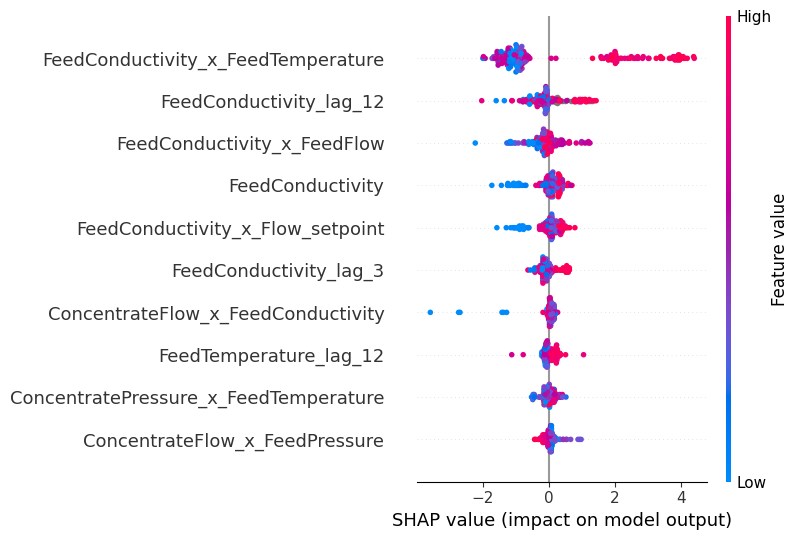

In [14]:
from model.coarse_feature_selection.cfs import random_forest_regressor
top_k_features = random_forest_regressor(dp, 'PermeateConductivity', fs, plant_name='plantT2')

In [15]:
######## 4 Feature Selection ##########

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from data_processor import DataProcessor

target = 'PermeateConductivity'

# 1. Data Preprocessing
# Remove cycle metadata (cycle_id, cycle_time) and timestamp since these should not be inputs for RF
features = [f for f in fs if f not in ['cycle_id']]
context_cols = ['cycle_time']
# Select first 10000 rows for feature selection
selected_inputs_data = dp.df[0:10000]
selected_outputs_data = dp.outputs_df[0:10000]
X_train, X_test, y_train, y_test = train_test_split(selected_inputs_data[features], selected_outputs_data[target], test_size=0.2, random_state=42)

In [16]:
# size of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 64)
(2000, 64)
(8000,)
(2000,)


In [17]:
 # 2. Train Random Forest
print("Training RandomForest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

Training RandomForest...


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Gets feature importances from RF, sorts features from most to least important. 
# Keeps 4 * top_num of them
top_num = 5
importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=X_train.columns)
top_features = feature_importance_series.sort_values(ascending=False).head(4*top_num).index.tolist()
top_features

['FeedConductivity_x_FeedTemperature',
 'FeedConductivity_lag_12',
 'FeedConductivity',
 'FeedConductivity_x_Flow_setpoint',
 'FeedConductivity_lag_3',
 'FeedConductivity_x_FeedFlow',
 'FeedConductivity_lag_1',
 'cycle_time',
 'ConcentrateFlow_x_FeedConductivity',
 'FeedConductivity_lag_6',
 'FeedConductivity_lag_2',
 'FeedTemperature_lag_1',
 'FeedTemperature_lag_3',
 'FeedTemperature_lag_12',
 'FeedTemperature_x_Flow_setpoint',
 'FeedPressure_x_FeedTemperature',
 'ConcentratePressure_x_FeedTemperature',
 'FeedTemperature',
 'ConcentrateFlow_x_ConcentratePressure',
 'ConcentrateFlow_x_FeedPressure']

In [19]:
# Train again using top features
X_sub = X_train[top_features]
y_sub = y_train
print("Training simple RandomForest...")
rf_small = RandomForestRegressor(n_estimators=100, random_state=42)
rf_small.fit(X_sub, y_sub.values.ravel())
# Build SHAP explainer based on RF
explainer = shap.TreeExplainer(rf_small)
# SHAP refinement
X_sub_sample = X_sub.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sub_sample)


Training simple RandomForest...


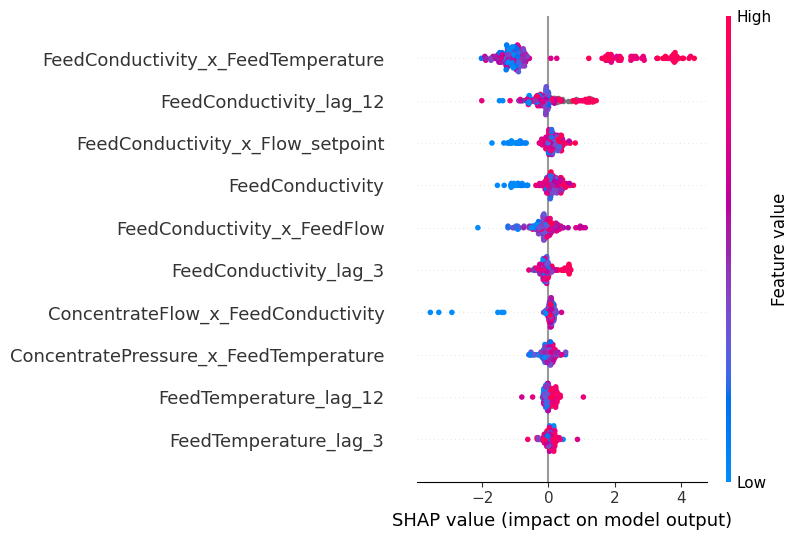

In [20]:
 # 3. SHAP Analysis
shap_importance = pd.Series(np.abs(shap_values).mean(axis=0), index=X_sub.columns)
top_k_features = shap_importance.sort_values(ascending=False).head(top_num*2).index.tolist()

shap.summary_plot(shap_values, X_sub_sample, feature_names=X_sub.columns, max_display=top_num*2)

In [21]:
top_k_features

['FeedConductivity_x_FeedTemperature',
 'FeedConductivity_lag_12',
 'FeedConductivity_x_Flow_setpoint',
 'FeedConductivity',
 'FeedConductivity_x_FeedFlow',
 'FeedConductivity_lag_3',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentratePressure_x_FeedTemperature',
 'FeedTemperature_lag_12',
 'FeedTemperature_lag_3']

Scaler已保存到: ../data/model_data/scaler_x_PermeateConductivity.pkl
Scaler已保存到: ../data/model_data/scaler_y_PermeateConductivity.pkl


Epoch 1/100: 100%|██████████| 143/143 [00:03<00:00, 36.70it/s]


Epoch [1/100]  Train Loss: 0.1586  Test Loss: 0.1539


Epoch 2/100: 100%|██████████| 143/143 [00:03<00:00, 43.52it/s]


Epoch [2/100]  Train Loss: 0.1809  Test Loss: 0.1433


Epoch 3/100: 100%|██████████| 143/143 [00:03<00:00, 42.60it/s]


Epoch [3/100]  Train Loss: 0.2425  Test Loss: 0.1579


Epoch 4/100: 100%|██████████| 143/143 [00:03<00:00, 41.69it/s]


Epoch [4/100]  Train Loss: 0.1534  Test Loss: 0.1349


Epoch 5/100: 100%|██████████| 143/143 [00:03<00:00, 45.54it/s]


Epoch [5/100]  Train Loss: 0.2035  Test Loss: 0.2514


Epoch 6/100: 100%|██████████| 143/143 [00:03<00:00, 44.78it/s]


Epoch [6/100]  Train Loss: 0.2625  Test Loss: 0.3432


Epoch 7/100: 100%|██████████| 143/143 [00:03<00:00, 45.84it/s]


Epoch [7/100]  Train Loss: 0.2798  Test Loss: 0.1532


Epoch 8/100: 100%|██████████| 143/143 [00:03<00:00, 44.70it/s]


Epoch [8/100]  Train Loss: 0.1641  Test Loss: 0.1671
Early stopping at epoch 8
R2 Score: -2.0512, MAE: 4.5367


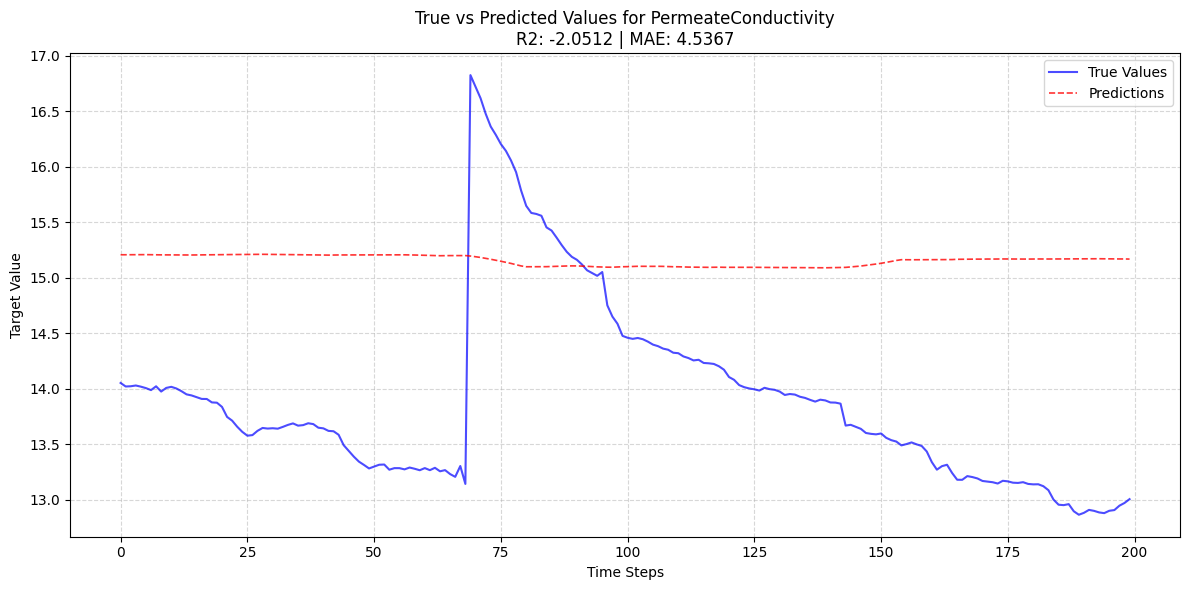

In [22]:
from model.lstm_model.enhanced_lstm import lstm_model

target_col = dp.outputs_df[['PermeateConductivity']].copy()

# Create a wrapper object or pass data correctly
# Option 1: Create a simple object to hold df
class DataWrapper:
    def __init__(self, df):
        self.df = df

dp_temp = dp.df.copy()
dp_temp['PermeateConductivity'] = target_col.values

# Wrap it
dp_wrapped = DataWrapper(dp_temp)

target = ['PermeateConductivity']
lstm_model(dp_wrapped, top_k_features, target, feature_name='PermeateConductivity')

Epoch 1/30: 100%|██████████| 125/125 [00:01<00:00, 95.90it/s] 


Epoch [1/30]  Train Loss: 1.0088  Test Loss: 9.1477


Epoch 2/30: 100%|██████████| 125/125 [00:01<00:00, 100.79it/s]


Epoch [2/30]  Train Loss: 0.8766  Test Loss: 9.0217


Epoch 3/30: 100%|██████████| 125/125 [00:01<00:00, 69.08it/s] 


Epoch [3/30]  Train Loss: 0.8147  Test Loss: 8.7442


Epoch 4/30: 100%|██████████| 125/125 [00:01<00:00, 103.79it/s]


Epoch [4/30]  Train Loss: 0.7520  Test Loss: 8.3286


Epoch 5/30: 100%|██████████| 125/125 [00:00<00:00, 144.19it/s]


Epoch [5/30]  Train Loss: 0.7124  Test Loss: 8.2408


Epoch 6/30: 100%|██████████| 125/125 [00:01<00:00, 119.88it/s]


Epoch [6/30]  Train Loss: 0.6841  Test Loss: 8.0611


Epoch 7/30: 100%|██████████| 125/125 [00:00<00:00, 137.08it/s]


Epoch [7/30]  Train Loss: 0.6538  Test Loss: 8.1253
🛑 No improvement for 1 epoch(s)


Epoch 8/30: 100%|██████████| 125/125 [00:00<00:00, 141.60it/s]


Epoch [8/30]  Train Loss: 0.6355  Test Loss: 7.9921


Epoch 9/30: 100%|██████████| 125/125 [00:00<00:00, 129.93it/s]


Epoch [9/30]  Train Loss: 0.6028  Test Loss: 8.0389
🛑 No improvement for 1 epoch(s)


Epoch 10/30: 100%|██████████| 125/125 [00:01<00:00, 124.60it/s]


Epoch [10/30]  Train Loss: 0.5942  Test Loss: 7.8963


Epoch 11/30: 100%|██████████| 125/125 [00:01<00:00, 123.19it/s]


Epoch [11/30]  Train Loss: 0.5412  Test Loss: 7.6812


Epoch 12/30: 100%|██████████| 125/125 [00:01<00:00, 109.36it/s]


Epoch [12/30]  Train Loss: 0.5686  Test Loss: 7.7106
🛑 No improvement for 1 epoch(s)


Epoch 13/30: 100%|██████████| 125/125 [00:01<00:00, 123.05it/s]


Epoch [13/30]  Train Loss: 0.5302  Test Loss: 8.1798
🛑 No improvement for 2 epoch(s)


Epoch 14/30: 100%|██████████| 125/125 [00:00<00:00, 147.43it/s]


Epoch [14/30]  Train Loss: 0.5178  Test Loss: 7.7275
🛑 No improvement for 3 epoch(s)


Epoch 15/30: 100%|██████████| 125/125 [00:01<00:00, 116.66it/s]


Epoch [15/30]  Train Loss: 0.4574  Test Loss: 8.0306
🛑 No improvement for 4 epoch(s)


Epoch 16/30: 100%|██████████| 125/125 [00:00<00:00, 132.79it/s]


Epoch [16/30]  Train Loss: 0.4263  Test Loss: 8.0172
🛑 No improvement for 5 epoch(s)


Epoch 17/30: 100%|██████████| 125/125 [00:01<00:00, 106.11it/s]


Epoch [17/30]  Train Loss: 0.4243  Test Loss: 7.8960
🛑 No improvement for 6 epoch(s)


Epoch 18/30: 100%|██████████| 125/125 [00:00<00:00, 128.78it/s]


Epoch [18/30]  Train Loss: 0.3825  Test Loss: 7.8995
🛑 No improvement for 7 epoch(s)


Epoch 19/30: 100%|██████████| 125/125 [00:00<00:00, 138.52it/s]


Epoch [19/30]  Train Loss: 0.4103  Test Loss: 8.3444
🛑 No improvement for 8 epoch(s)


Epoch 20/30: 100%|██████████| 125/125 [00:00<00:00, 142.68it/s]


Epoch [20/30]  Train Loss: 0.3886  Test Loss: 7.6170


Epoch 21/30: 100%|██████████| 125/125 [00:00<00:00, 142.47it/s]


Epoch [21/30]  Train Loss: 0.3838  Test Loss: 8.5115
🛑 No improvement for 1 epoch(s)


Epoch 22/30: 100%|██████████| 125/125 [00:00<00:00, 127.01it/s]


Epoch [22/30]  Train Loss: 0.3450  Test Loss: 7.9859
🛑 No improvement for 2 epoch(s)


Epoch 23/30: 100%|██████████| 125/125 [00:00<00:00, 154.02it/s]


Epoch [23/30]  Train Loss: 0.3407  Test Loss: 8.7536
🛑 No improvement for 3 epoch(s)


Epoch 24/30: 100%|██████████| 125/125 [00:00<00:00, 151.81it/s]


Epoch [24/30]  Train Loss: 0.3084  Test Loss: 9.6046
🛑 No improvement for 4 epoch(s)


Epoch 25/30: 100%|██████████| 125/125 [00:00<00:00, 139.77it/s]


Epoch [25/30]  Train Loss: 0.2968  Test Loss: 9.2956
🛑 No improvement for 5 epoch(s)


Epoch 26/30: 100%|██████████| 125/125 [00:01<00:00, 115.08it/s]


Epoch [26/30]  Train Loss: 0.3258  Test Loss: 9.4453
🛑 No improvement for 6 epoch(s)


Epoch 27/30: 100%|██████████| 125/125 [00:00<00:00, 138.83it/s]


Epoch [27/30]  Train Loss: 0.2784  Test Loss: 9.4102
🛑 No improvement for 7 epoch(s)


Epoch 28/30: 100%|██████████| 125/125 [00:00<00:00, 147.52it/s]


Epoch [28/30]  Train Loss: 0.2564  Test Loss: 9.2979
🛑 No improvement for 8 epoch(s)


Epoch 29/30: 100%|██████████| 125/125 [00:00<00:00, 145.50it/s]


Epoch [29/30]  Train Loss: 0.2300  Test Loss: 10.1983
🛑 No improvement for 9 epoch(s)


Epoch 30/30: 100%|██████████| 125/125 [00:00<00:00, 140.10it/s]


Epoch [30/30]  Train Loss: 0.2373  Test Loss: 9.6077
🛑 No improvement for 10 epoch(s)

✅ Early stopping triggered at epoch 30. Best val loss: 7.6170
(1989, 1) (1989, 1)


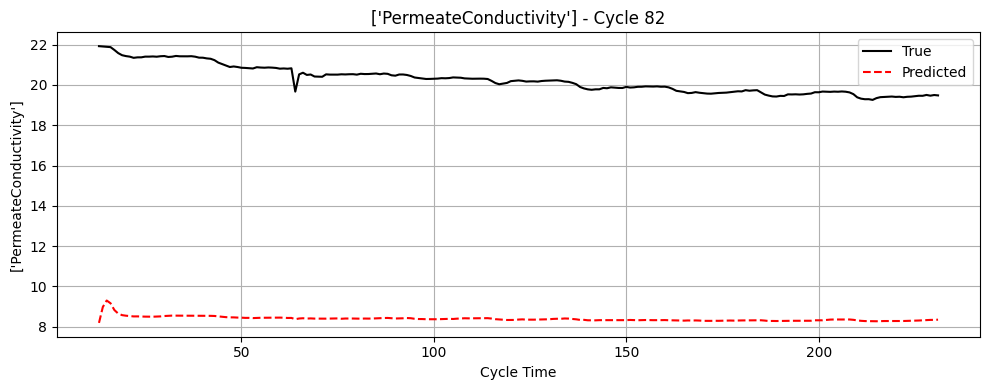

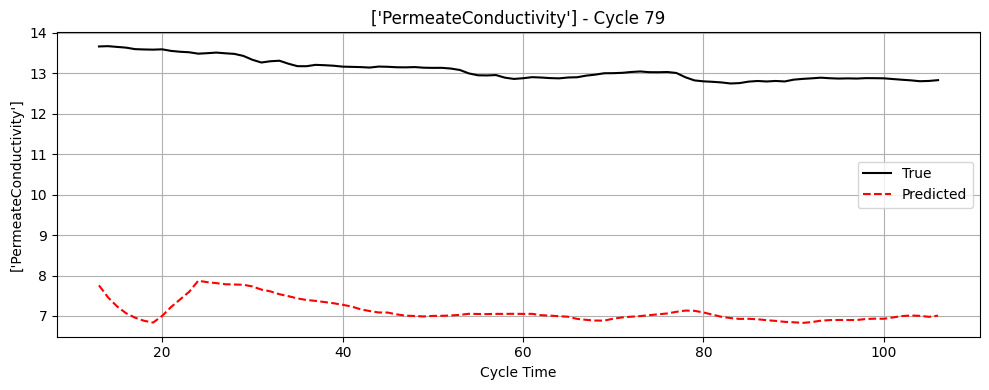

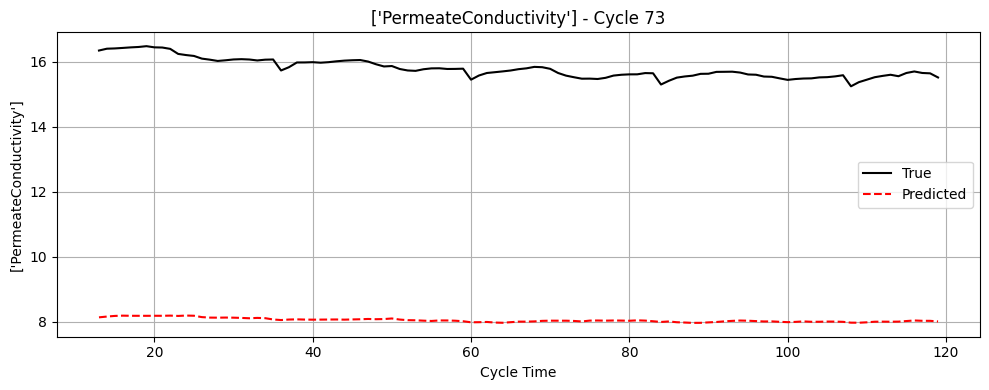

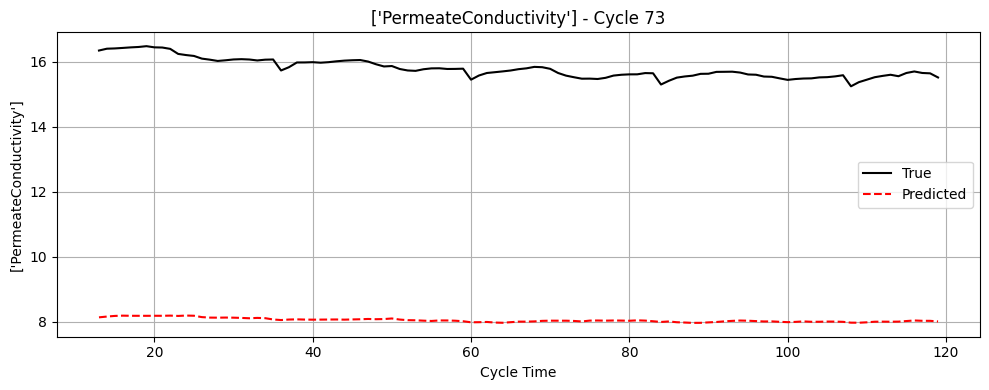



[Drop Feature Selection]

Base Loss: 9.607651
Drop FeedConductivity_x_FeedTemperature: loss delta = 0.063422
Drop FeedConductivity_lag_12: loss delta = -0.028639
Drop FeedConductivity_x_Flow_setpoint: loss delta = -0.005786
Drop FeedConductivity: loss delta = 0.009984
Drop FeedConductivity_x_FeedFlow: loss delta = 0.000085
Drop FeedConductivity_lag_3: loss delta = -0.010147
Drop ConcentrateFlow_x_FeedConductivity: loss delta = -0.069560
Drop ConcentratePressure_x_FeedTemperature: loss delta = -0.112113
Drop FeedTemperature_lag_12: loss delta = 0.002931
Drop FeedTemperature_lag_3: loss delta = 0.001748

最终选定特征数: 1


In [23]:
from model.fine_feature_selection.ffs import fine_feature_selection
target = ['PermeateConductivity']
s_features = fine_feature_selection(dp_wrapped, top_k_features, target)

In [24]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from data_loader import time_series_loader,test_time_series_loader
import joblib  # 或使用 pickle

selected_features = top_k_features


In [25]:
selected_features

['FeedConductivity_x_FeedTemperature',
 'FeedConductivity_lag_12',
 'FeedConductivity_x_Flow_setpoint',
 'FeedConductivity',
 'FeedConductivity_x_FeedFlow',
 'FeedConductivity_lag_3',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentratePressure_x_FeedTemperature',
 'FeedTemperature_lag_12',
 'FeedTemperature_lag_3']

In [26]:
if dp_wrapped.df[top_k_features + target ].isnull().sum().sum() > 0:
    df_dropna = dp_wrapped.df[top_k_features + target ].dropna()
else:
    df_dropna = dp_wrapped.df[top_k_features + target ]


In [27]:
df_dropna

,FeedConductivity_x_FeedTemperature,FeedConductivity_lag_12,FeedConductivity_x_Flow_setpoint,FeedConductivity,FeedConductivity_x_FeedFlow,FeedConductivity_lag_3,ConcentrateFlow_x_FeedConductivity,ConcentratePressure_x_FeedTemperature,FeedTemperature_lag_12,FeedTemperature_lag_3,PermeateConductivity
12,19955.148782,238.817517,71525.255000,238.417517,100612.192033,238.316424,29308.606276,16007.236501,82.621667,83.321667,2.676670
13,19901.168466,238.381998,71531.187203,238.437291,100604.371426,238.284183,29403.219462,16042.786430,82.259016,83.241667,2.712504
14,19791.701906,238.534183,71536.271949,238.454240,100967.183380,238.400850,29553.659118,15983.197458,83.078333,83.395000,2.736831
15,19884.555941,238.567517,71597.288898,238.657630,101020.943104,238.417517,29542.677632,15994.401563,82.926667,83.698333,2.771536
16,19961.341732,238.562325,71570.255000,238.567517,100914.059550,238.437291,29527.754809,16186.737138,82.410000,83.465000,2.794216
...,...,...,...,...,...,...,...,...,...,...,...
12496,23263.659967,286.501700,85960.510000,286.535033,116380.979372,286.501700,37772.584323,16351.345280,80.858333,80.172917,23.850765
12497,23114.303581,286.501700,85960.510000,286.535033,116142.200178,286.501700,37679.501106,16387.368575,80.260833,80.582083,23.541715
12498,23254.746110,286.501700,85950.510000,286.501700,116376.990540,286.535033,37864.799716,16479.792681,80.131667,80.979583,23.733480
12499,23367.323936,286.501700,85990.510000,286.635033,115953.425484,286.535033,37614.728649,16397.893105,80.340833,81.189583,23.864958


In [28]:
MAX_SAMPLES = 15000
# 限制数据点数量
if len(df_dropna) > MAX_SAMPLES:
    df_dropna = df_dropna.iloc[-MAX_SAMPLES:]  # 保留最近的 10000 条记录


In [29]:
df_dropna

,FeedConductivity_x_FeedTemperature,FeedConductivity_lag_12,FeedConductivity_x_Flow_setpoint,FeedConductivity,FeedConductivity_x_FeedFlow,FeedConductivity_lag_3,ConcentrateFlow_x_FeedConductivity,ConcentratePressure_x_FeedTemperature,FeedTemperature_lag_12,FeedTemperature_lag_3,PermeateConductivity
12,19955.148782,238.817517,71525.255000,238.417517,100612.192033,238.316424,29308.606276,16007.236501,82.621667,83.321667,2.676670
13,19901.168466,238.381998,71531.187203,238.437291,100604.371426,238.284183,29403.219462,16042.786430,82.259016,83.241667,2.712504
14,19791.701906,238.534183,71536.271949,238.454240,100967.183380,238.400850,29553.659118,15983.197458,83.078333,83.395000,2.736831
15,19884.555941,238.567517,71597.288898,238.657630,101020.943104,238.417517,29542.677632,15994.401563,82.926667,83.698333,2.771536
16,19961.341732,238.562325,71570.255000,238.567517,100914.059550,238.437291,29527.754809,16186.737138,82.410000,83.465000,2.794216
...,...,...,...,...,...,...,...,...,...,...,...
12496,23263.659967,286.501700,85960.510000,286.535033,116380.979372,286.501700,37772.584323,16351.345280,80.858333,80.172917,23.850765
12497,23114.303581,286.501700,85960.510000,286.535033,116142.200178,286.501700,37679.501106,16387.368575,80.260833,80.582083,23.541715
12498,23254.746110,286.501700,85950.510000,286.501700,116376.990540,286.535033,37864.799716,16479.792681,80.131667,80.979583,23.733480
12499,23367.323936,286.501700,85990.510000,286.635033,115953.425484,286.535033,37614.728649,16397.893105,80.340833,81.189583,23.864958


In [30]:
X_raw = df_dropna[selected_features].values
y_raw = df_dropna[target].values

In [31]:
X_raw

array([[1.99551488e+04, 2.38817517e+02, 7.15252550e+04, ...,
        1.60072365e+04, 8.26216667e+01, 8.33216667e+01],
       [1.99011685e+04, 2.38381998e+02, 7.15311872e+04, ...,
        1.60427864e+04, 8.22590164e+01, 8.32416667e+01],
       [1.97917019e+04, 2.38534183e+02, 7.15362719e+04, ...,
        1.59831975e+04, 8.30783333e+01, 8.33950000e+01],
       ...,
       [2.32547461e+04, 2.86501700e+02, 8.59505100e+04, ...,
        1.64797927e+04, 8.01316667e+01, 8.09795833e+01],
       [2.33673239e+04, 2.86501700e+02, 8.59905100e+04, ...,
        1.63978931e+04, 8.03408333e+01, 8.11895833e+01],
       [2.32736105e+04, 2.86501700e+02, 8.59805100e+04, ...,
        1.65058130e+04, 8.02183333e+01, 8.06683333e+01]],
      shape=(11385, 10))

In [32]:
y_raw

array([[ 2.67667033],
       [ 2.71250372],
       [ 2.73683088],
       ...,
       [23.73347978],
       [23.86495775],
       [23.70961917]], shape=(11385, 1))

In [33]:
test_size = 0.2
random_state = 42

split_idx = int(len(X_raw) * (1 - test_size))
X_train_raw, X_test_raw = X_raw[:split_idx], X_raw[split_idx:]
y_train_raw, y_test_raw = y_raw[:split_idx], y_raw[split_idx:]
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=random_state, shuffle=False)

In [34]:
feature_name = 'PermeateConductivity'

train_data_export = pd.DataFrame(np.concatenate([X_train, y_train.reshape(-1, 1)], axis=1), columns=selected_features + [target_col])
val_data_export = pd.DataFrame(np.concatenate([X_val, y_val.reshape(-1, 1)], axis=1), columns=selected_features + [target_col])
test_data_export = pd.DataFrame(np.concatenate([X_test_raw, y_test_raw.reshape(-1, 1)], axis=1), columns=selected_features + [target_col])
train_data_export.to_csv(f'../data/model_data/train_data_export_{feature_name}.csv', index=False)
val_data_export.to_csv(f'../data/model_data/val_data_export_{feature_name}.csv', index=False)
test_data_export.to_csv(f'../data/model_data/test_data_export_{feature_name}.csv', index=False)

In [35]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train_raw)
scaler_x_path = f'../data/model_data/scaler_x_{feature_name}.pkl'
scaler_x_export = StandardScaler().fit(X_train_raw)
joblib.dump(scaler_x_export, scaler_x_path)  # 或者用 pickle.dump()
print(f"Scaler已保存到: {scaler_x_path}")
X_test = scaler_x.transform(X_test_raw)
X_val = scaler_x.transform(X_val)

Scaler已保存到: ../data/model_data/scaler_x_PermeateConductivity.pkl


In [36]:
X_train 

array([[ 0.29906429, -1.54480577, -1.59210232, ..., -1.27732651,
         0.94939606,  1.0332242 ],
       [ 0.27344409, -1.58441328, -1.59028659, ..., -1.26391537,
         0.90104898,  1.02258875],
       [ 0.22148896, -1.57057302, -1.58873025, ..., -1.28639519,
         1.01027703,  1.04297336],
       ...,
       [ 1.35452135,  0.97288306,  0.98669996, ...,  1.78535417,
         0.66552717,  1.01427981],
       [ 1.22736011,  0.99971877,  0.99282156, ...,  1.65628702,
         0.62254971,  1.02247797],
       [ 1.32103085,  0.96985162,  1.00226335, ...,  1.74750107,
         0.64832413,  1.03068176]], shape=(9108, 10))

In [37]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train_raw)
y_test = scaler_y.transform(y_test_raw)
y_val = scaler_y.transform(y_val)
scaler_y_path = f'../data/model_data/scaler_y_{feature_name}.pkl'
scaler_y_export = StandardScaler().fit(y_train_raw)
joblib.dump(scaler_y_export, scaler_y_path)  # 或者用 pickle.dump()
print(f"Scaler已保存到: {scaler_y_path}")

Scaler已保存到: ../data/model_data/scaler_y_PermeateConductivity.pkl


In [38]:
SEQ_LEN = 72
train_loader = time_series_loader(X_train, y_train, seq_len=SEQ_LEN, batch_size=64, shuffle=False)
val_loader = time_series_loader(X_val, y_val, seq_len=SEQ_LEN, batch_size=64, shuffle=False)
test_loader = time_series_loader(X_test, y_test, seq_len=SEQ_LEN, batch_size=64, shuffle=False)

In [39]:
class EnhancedLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2 if num_layers > 1 else 0
        )
        self.attention = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1),
            nn.Softmax(dim=1)
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, output_dim)
        )
        
    def forward(self, x):
        # x: [batch_size, seq_len, input_dim]
        lstm_out, _ = self.lstm(x)  # [batch_size, seq_len, hidden_dim]
        
        # 注意力机制
        attn_weights = self.attention(lstm_out)  # [batch_size, seq_len, 1]
        context = torch.sum(attn_weights * lstm_out, dim=1)  # [batch_size, hidden_dim]
        
        return self.fc(context)

In [40]:
def evaluate_model(model, val_loader, device, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            y_pred = model(X_val)
            loss = criterion(y_pred, y_val)
            total_loss += loss.item() * X_val.size(0)
    return total_loss / len(val_loader.dataset)


def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=100, patience = 5):
    #early stopping
    best_val_loss = float('inf')
    epoch_without_improvement = 0
    best_model_weights = model.state_dict()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for X_train, y_train in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            X_train, y_train = X_train.to(device), y_train.to(device)
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_train.size(0)
        val_loss = evaluate_model(model, val_loader, device, criterion)
        print(f"Epoch [{epoch+1}/{num_epochs}]  Train Loss: {train_loss/len(train_loader.dataset):.4f}  Test Loss: {val_loss:.4f}")

        #early_stopping
        if val_loss <best_val_loss:
            best_val_loss = val_loss
            best_model_weights = model.state_dict()
        else:
            epoch_without_improvement +=1

        if epoch_without_improvement >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_weights)
            break
    return model

In [41]:
def model_analysis(test_loader, model_weights_path, scaler_x, scaler_y, target_col, device, feature_name):
    model = EnhancedLSTM(input_dim=test_loader.dataset.X.shape[1], hidden_dim=128, output_dim=1, num_layers=2).to(device)
    model.load_state_dict(torch.load(model_weights_path))
    model.eval()

    # 收集预测和真实值
    y_preds = []
    y_trues = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            preds = model(X_batch).cpu().numpy()
            y_preds.append(preds)
            y_trues.append(y_batch.numpy())

    # 合并结果并确保长度一致
    y_pred = np.concatenate(y_preds, axis=0)
    y_true = np.concatenate(y_trues, axis=0)

    # 反归一化
    y_pred = scaler_y.inverse_transform(y_pred)
    y_true = scaler_y.inverse_transform(y_true)
    
    # 检查长度是否一致
    assert len(y_pred) == len(y_true), f"预测值({len(y_pred)})和真实值({len(y_true)})长度不一致"

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"R2 Score: {r2:.4f}, MAE: {mae:.4f}")

    # 绘制对比曲线
    plt.figure(figsize=(12, 6))
    
    # 绘制前200个样本更清晰（可根据需要调整）
    plot_samples = min(200, len(y_true))
    plt.plot(y_true[:plot_samples], 'b-', label='True Values', alpha=0.7, linewidth=1.5)
    plt.plot(y_pred[:plot_samples], 'r--', label='Predictions', alpha=0.8, linewidth=1.2)
    
    # 添加标注
    plt.title(f'True vs Predicted Values for {feature_name}\nR2: {r2:.4f} | MAE: {mae:.4f}')
    plt.xlabel('Time Steps')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # 突出显示异常区域
    diff = np.abs(y_true[:plot_samples] - y_pred[:plot_samples])
    threshold = np.mean(diff) + 2 * np.std(diff)
    anomalies = np.where(diff > threshold)[0]
    plt.scatter(anomalies, y_true[anomalies], c='yellow', s=50, 
                edgecolors='red', label='Large Errors', zorder=3)
    
    plt.tight_layout()
    plt.savefig(f'../img/true_vs_predicted_plant1_{feature_name}.png', dpi=300, bbox_inches='tight')
    plt.show()




Epoch 1/100: 100%|██████████| 142/142 [00:14<00:00,  9.73it/s]


Epoch [1/100]  Train Loss: 0.1941  Test Loss: 0.1248


Epoch 2/100: 100%|██████████| 142/142 [00:12<00:00, 11.49it/s]


Epoch [2/100]  Train Loss: 0.2881  Test Loss: 0.1294


Epoch 3/100: 100%|██████████| 142/142 [00:14<00:00, 10.02it/s]


Epoch [3/100]  Train Loss: 0.2070  Test Loss: 0.1291


Epoch 4/100: 100%|██████████| 142/142 [00:12<00:00, 11.26it/s]


Epoch [4/100]  Train Loss: 0.2166  Test Loss: 0.1555


Epoch 5/100: 100%|██████████| 142/142 [00:12<00:00, 11.05it/s]


Epoch [5/100]  Train Loss: 0.3335  Test Loss: 0.3721


Epoch 6/100: 100%|██████████| 142/142 [00:12<00:00, 11.34it/s]


Epoch [6/100]  Train Loss: 0.3453  Test Loss: 0.4021
Early stopping at epoch 6
R2 Score: -7.8753, MAE: 7.7704


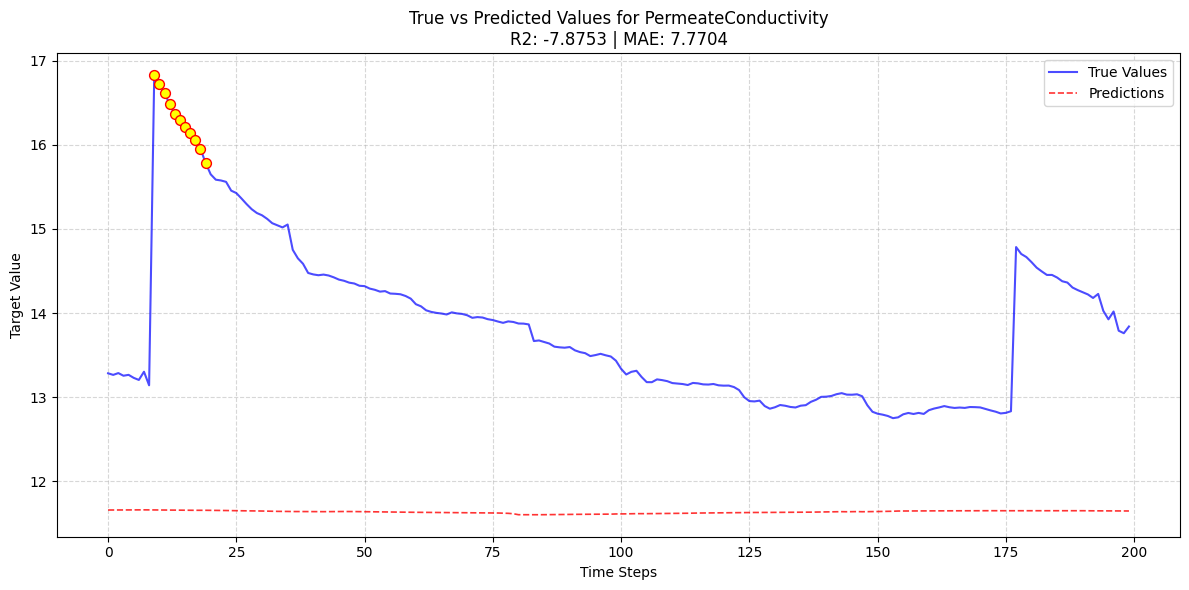

In [42]:
num_epochs = 100
patience = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = EnhancedLSTM(input_dim=X_train.shape[1], hidden_dim=128, output_dim=1, num_layers=2).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.HuberLoss()  # 对异常值更鲁棒
train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=num_epochs, patience=patience)
model_weights_path = f"../model/model_weights_{feature_name}.pth"
torch.save(model.state_dict(), model_weights_path)
model_analysis(test_loader, model_weights_path, scaler_x, scaler_y, target_col, device, feature_name)


In [43]:
y_mean = y_train_raw.mean()
mae_mean = np.mean(np.abs(y_test_raw - y_mean))
print("Baseline MAE (mean):", mae_mean)


Baseline MAE (mean): 11.328738553082871


In [44]:
y_pred_persist = y_test_raw[:-1]
y_true_persist = y_test_raw[1:]
mae_persist = np.mean(np.abs(y_true_persist - y_pred_persist))
print("Baseline MAE (persist):", mae_persist)


Baseline MAE (persist): 0.062344374059590105
